# Tutorial of Dendrite-Center model simulation

**Center** model s a dendrite simulation in which a round nucleus is generated from the center.<br>
This tutorial will show you how to run the simulation.

In [ ]:
import phasepy

### How to save the format of an input file to your environment

Before running the simulation, please make sure that the input files are properly formatted and loaded into your environment.<br>
If the setup does not live in your environment, you can do as follow : 
 ```python
 phasepy.FmtFile.mk_yourenv(copy_path=copy_path)
 ```


In [ ]:
import os

copy_path = "input"
try:
    phasepy.FmtFile.mk_yourenv(copy_path=copy_path)
except FileExistsError:
    print("Already exist <" + os.path.abspath(copy_path) + " >")

### How to Set Simulation Conditions

In this simulation, files in the **input** directory are used to set initial conditions.<br>

> <strong>Configuration of input directory </strong>

- input
    - setting.txt
    - outdata : Determine the output file
        - outdata_format.txt
        - outdata_1.txt
        - ...
    - param : Determine simulation parameters
        - param_format.txt
        - param_1.txt
        - ...
    - property : Determine material properties
        - property_format.txt
        - ni.txt
        - ...

You need to change only **setting.txt**.(Do not change the name)<br>
By editing within this file, you can determine which file is used as the iuput.<br>
If you wish to run the simulation under other conditions, enter the new parameters in the **3 directories** according to the format and edit the file name in **setting.txt**.<br>

Click <a href="#input_info">here</a> for more information about input files.<br>

### Start simulation
When the simulation is run, some messages are output, but if you don't need the output, you can change the **simple** in the **core** by yourself.


(2022/06/03, only a simple model has been implemented, but will be added in the future when other functions are implemented.)

In [ ]:
phasepy.simple()

### Description of output results

Currently, a maximum of 7 output data can be obtained.

- 1. <a href="#phase_f">(Image) Phase field function</a>
- 2. (NPY) Phase field function
- 3. <a href="#tem_f">(Image) Temperature field</a>
- 4. (NPY) Temperature field
- 5. <a href="#tem_fluct">(NPY) Thermal fluctuations</a>
- 6. <a href="#chem_e">(NPY) Chemical energy</a>
- 7. <a href="#grad_e">(NPY) Gradient energy</a>

These data are saved in **.png** or **.npy**.<br>

A description of each result is provided below. (The data stored in the **sample** directory is used. See **sample/condition** for the conditions of this data).

> <h4 id="phase_f">Phase field function</h4>

This shows how the white solid phase solidifies from the black liquid phase as follow :

|step = 0|step = 5000|step = 10000|step = 30000|
|------------|------------|------------|------------|
|![phase_f_0](./sample/phase_img/data_0.png)|![phase_f_5000](./sample/phase_img/data_5000.png)|![phase_f_10000](./sample/phase_img/data_10000.png)|![phase_f_30000](./sample/phase_img/data_30000.png)|

The solid phase is observed to increase with time. These are formed by **2 energy** and **thermal fluctuations**. And solidification can also be discussed mainly by the temperature field

> <h4 id="tem_f">Temperture field</h4>

This shows the temperature field, and the higher temperature is white in the image as follow :

|step = 0|step = 5000|step = 10000|step = 30000|
|------------|------------|------------|------------|
|![tem_f_0](./sample/tem_img/data_0.png)|![tem_f_5000](./sample/tem_img/data_5000.png)|![tem_f_10000](./sample/tem_img/data_10000.png)|![tem_f_30000](./sample/tem_img/data_30000.png)|

Regions with gradients in the temperature field are very important for solidification.

This function is provided to visualize data in npy format.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def plt_data(item: str) -> None:
    fig = plt.figure(figsize=(20,10))

    step=["0", "5000", "10000", "30000"]
    len_step = len(step)
    for i in range(len_step):
        data = np.load("./sample/" + item + "/data_" + step[i] + ".npy")
        ax = fig.add_subplot(1, len_step, (i+1))
        ax.imshow(data, cmap="bwr")
        ax.set_title("Step = " + step[i])
    fig.tight_layout() 

> <h4 id="tem_fluct">Thermal fluctuations</h4>

Since thermal fluctuations are saved as array data, the following process is required for visualization.

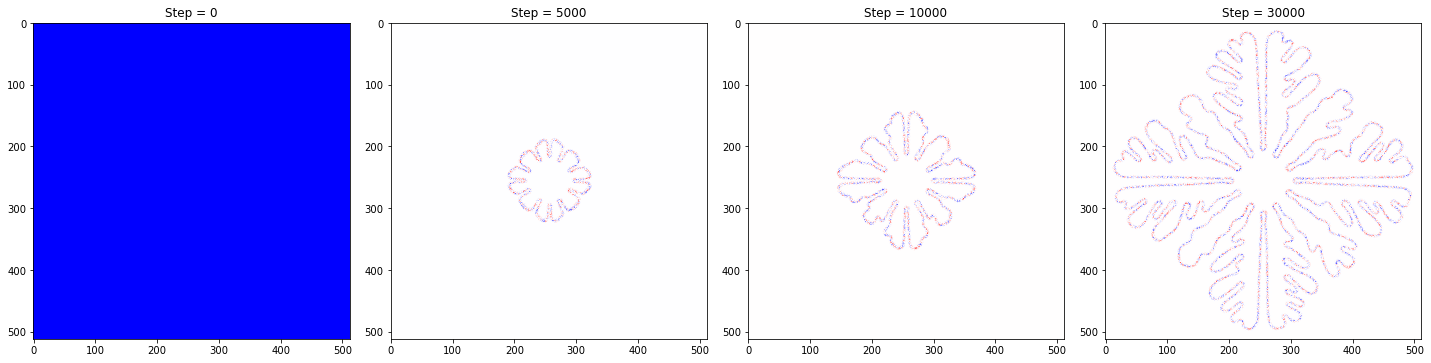

In [25]:
plt_data(item="fluct_npy")

You can see that thermal fluctuations occur only in the drive region.<br>
This thermal fluctuation forms complex structures such as secondary arms.

> <h4 id="chem_e">Chemical energy</h4>

Since chemical energy are saved as array data, the following process is required for visualization.

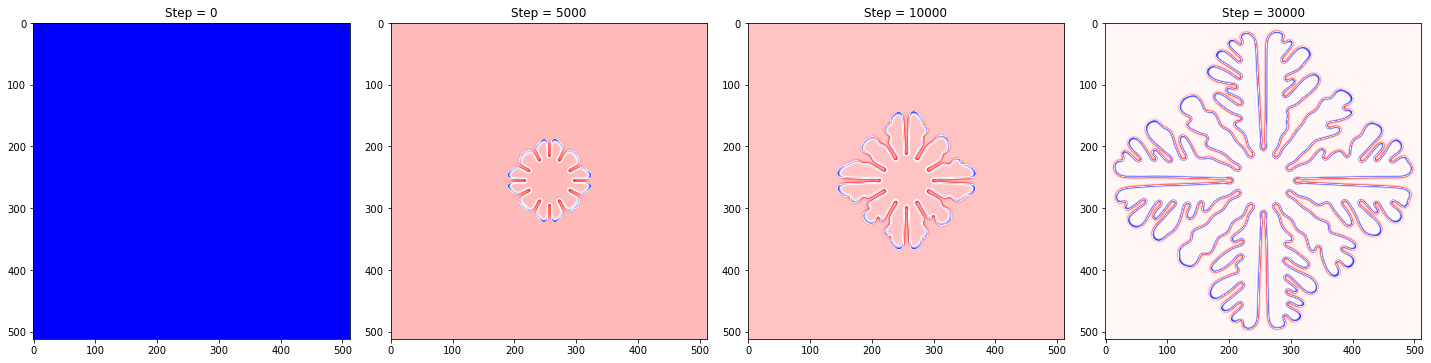

In [26]:
plt_data(item="chem_npy")

You can see that chemical energy spread out from the center.<br>


> <h4 id="grad_e">Gradient energy</h4>

Since gradient energy are saved as array data, the following process is required for visualization.

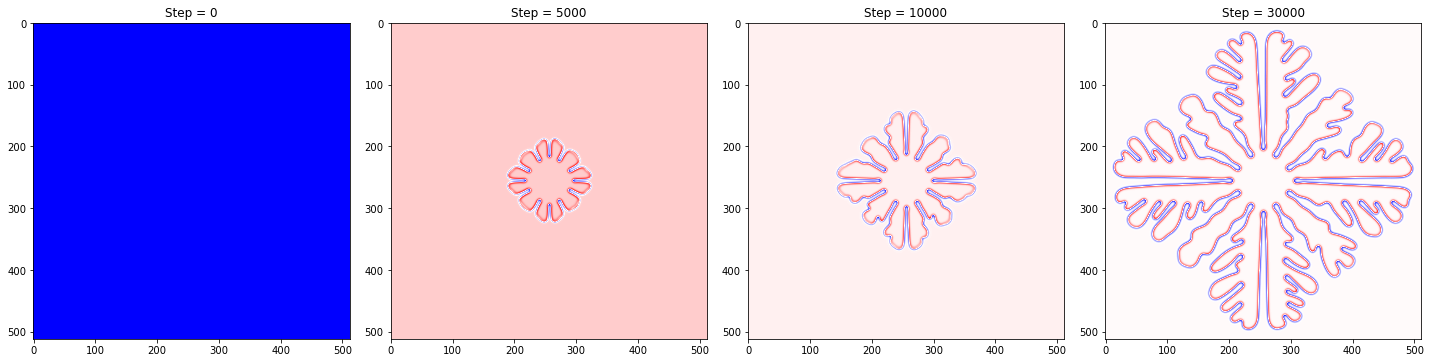

In [27]:
plt_data(item="grad_npy")

You can see that gradient energy occur in the drive region.<br>

<h3 id="input_info">Information about input files</h3>

> <h4>setting.txt</h4>

- <h5>Index of file</h5>
```python
#Specify the input file
#Please write only the file name
#-----------------------------------------
#File name of Property file (In property)
"property.txt"
#File name of Prameter file (In pram)<br>
"param.txt"
#File name of outdata file (In outdata)<br>
"outdata.txt"
```

Set 3 input file names.

> <h4>property.txt</h4>

- <h5>Index of file</h5>
```python
# 0. Thermal Conductivity [W/mK] (float)
84.01
# 1. Specific Heat [J/Km^3] (float)
5.42e6
# 2. Latent Heat [J/m^3] (float)
2.35e9
# 3. Melting Point [K] (float)
1728.0
# 4. Interface Kinetic Coefficient [m/Ks] (float)
2.0
# 5. Anisotropic number of directions (float)
4.0
# 6. Angle of priority growth direction (rad) (float)
0.0
# 7. Cell size [m] (float)
30.0e-9
# 8. Interfacial Width (Factor for cell size ) (float)
3.0
# 9. Interface Energy [J/m2] (float)
0.37
# 10. Lambda (float)
0.1
# 11. Anisotropic strength (float)
0.01
# 12. Supercooling temperature [K] (float)
1511.2
# 13. Noise amplitude (float)
0.1
```

Set different parameters for each material.

> <h4>param.txt</h4>

- <h5>Index of file</h5>
```python
# 0. Number of cells (x) (int)
512
# 1. Number of cells (y) (int)
512
# 2. Max time step (int)
5000
# 3. Saving time step (int)
1000
# 4. Size of the initial nucleus (cell size) (float)
10
```

Set the conditions for the simulation.

> <h4>outdata.txt</h4>

- <h5>Index of file</h5>
```python
# This file determine the output file settings.
# When outputting a file : 0, Not : 1, 
# ( Not 0 or 1 -> Not outputting )
# ----------------------------------------------
# 0. (Image) Phase field function
0
# 1. (NPY) Phase field function
0
# 2. (Image) Temperature field
0
# 3. (NPY) Temperature field
0
# 4. (NPY) Thermal fluctuations
0
# 5. (NPY) Chemical energy
0
# 6. (NPY) Gradient energy
0
```

Set output conditions.